In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [11]:
df_order_historic_demand = pd.read_excel('../../Datos_P1/df_historic_order_demand.xlsx')
df_distance_km = pd.read_excel('../../Datos_P1/df_distance_km.xlsx')
df_distance_min = pd.read_excel('../../Datos_P1/df_distance_min.xlsx')
df_location = pd.read_excel('../../Datos_P1/df_location.xlsx')
df_orders = pd.read_excel('../../Datos_P1/df_orders.xlsx')
df_vehicle = pd.read_excel('../../Datos_P1/df_vehicle.xlsx')


MAPA CLIENTES

In [12]:
# Configurar el gráfico de dispersión en el mapa
fig = px.scatter_mapbox(
    df_location,
    lat="Latitud",
    lon="Longitud",
    hover_name="Cliente",
    zoom=10,
    center={"lat": 40.416775, "lon": -3.703790},
    height=600
)

# Configurar el estilo del mapa a OpenStreetMap
fig.update_layout(
    mapbox_style="open-street-map"
)

# Aumentar el tamaño de los puntos
fig.update_traces(
    marker=dict(size=10)
)

fig.show()

DISTANCIAS ENTRE LOS CLIENTES

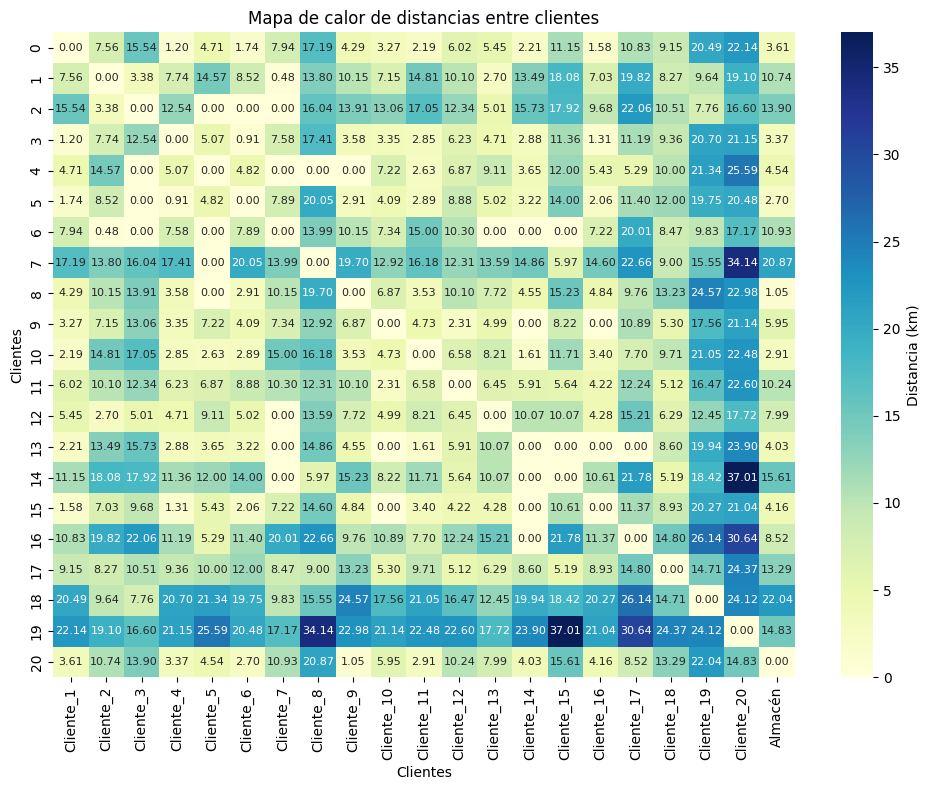

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_distance_km, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Distancia (km)'}, annot_kws={"fontsize": 8})
plt.title("Mapa de calor de distancias entre clientes")
plt.xlabel("Clientes")
plt.ylabel("Clientes")
plt.tight_layout()
plt.show()

DEMANDA CLIENTES

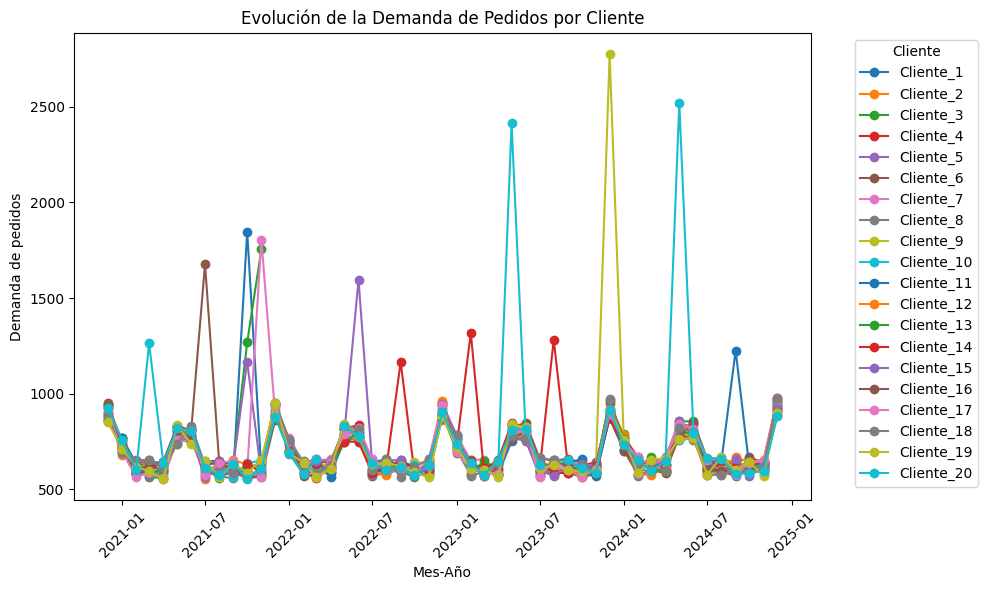

In [14]:
# Convertir la columna 'mes_anio' a tipo de fecha
df_order_historic_demand['mes_anio'] = pd.to_datetime(df_order_historic_demand['mes_anio'], format='%m-%Y')

plt.figure(figsize=(10, 6))

for cliente in df_order_historic_demand['cliente'].unique():
    df_cliente = df_order_historic_demand[df_order_historic_demand['cliente'] == cliente]
    plt.plot(df_cliente['mes_anio'], df_cliente['order_demand'], label=cliente, marker='o')

plt.xlabel('Mes-Año')
plt.ylabel('Demanda de pedidos')
plt.title('Evolución de la Demanda de Pedidos por Cliente')
plt.xticks(rotation=45)
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

DEMANDA CLIENTES ACTUAL

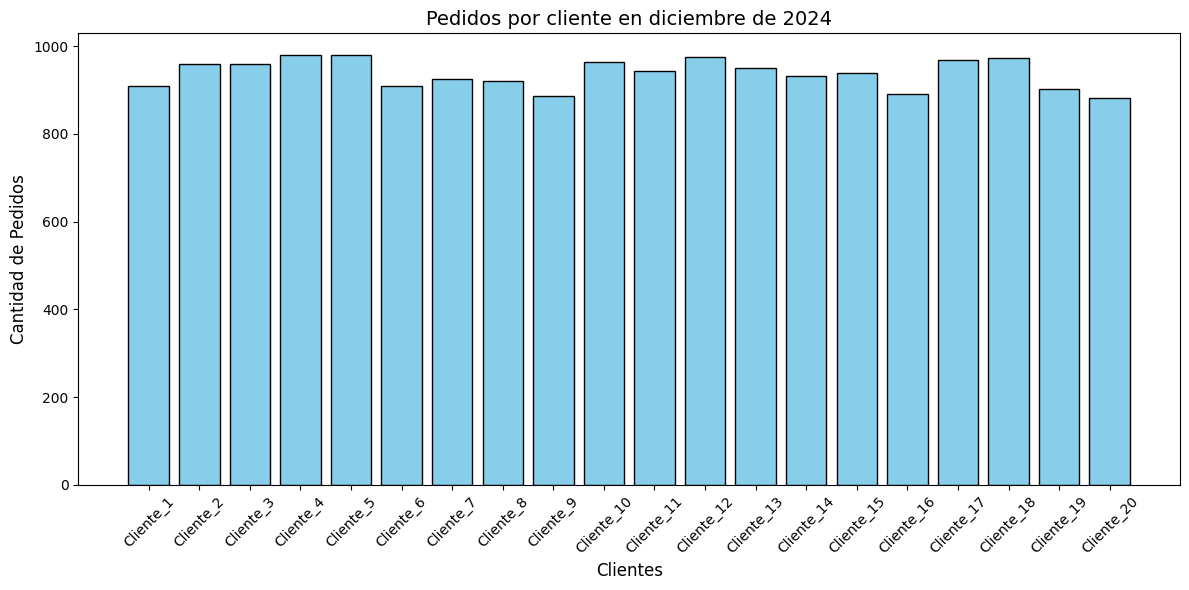

In [15]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_orders["cliente"], df_orders["order_demand"], color="skyblue", edgecolor="black")
plt.title("Pedidos por cliente en diciembre de 2024", fontsize=14)
plt.xlabel("Clientes", fontsize=12)
plt.ylabel("Cantidad de Pedidos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

VEHICULOS

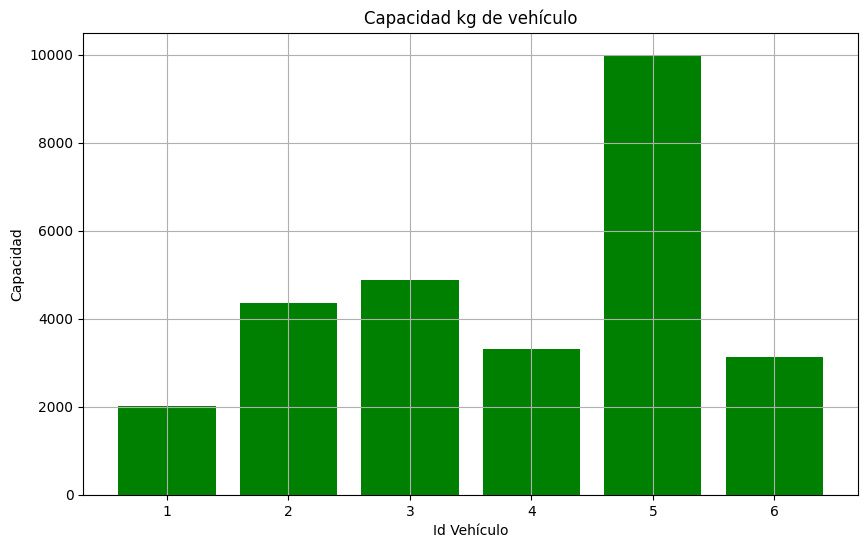

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df_vehicle['vehiculo_id'], df_vehicle['capacidad_kg'], color='green')
plt.title('Capacidad kg de vehículo')
plt.xlabel('Id Vehículo')
plt.ylabel('Capacidad')
plt.xticks(df_vehicle['vehiculo_id'])
plt.grid(True)
plt.show()

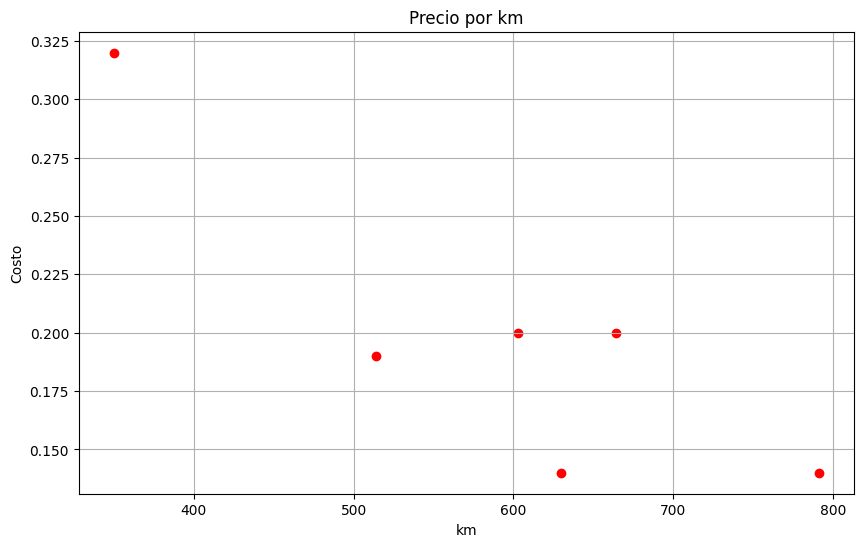

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_vehicle['autonomia_km'], df_vehicle['costo_km'], color='red')
plt.title('Precio por km')
plt.xlabel('km')
plt.ylabel('Costo')
plt.grid(True)
plt.show()